In [48]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

#Integración: Problema 21 Expansión en polinomios de Legendre.

TEÓRICO: Usando las relaciones de ortogonalidad de los polinomios de Legendre,
muestre que los coeficientes están dados po la integral dada.




In [49]:
def sgn(x):
  if x < 0:
    sign = -1
  elif x > 0:
    sign = 1
  else:
    sign = 0
  return sign

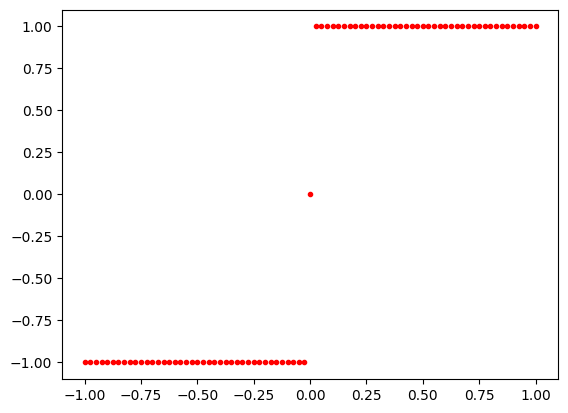

In [50]:
x_ =np.round(np.arange(-1, 1.025, 0.025),decimals=3)
signs = np.array([])
for i in x_:
  signs = np.append(signs,sgn(i))
plt.scatter(x_,signs,color="red",marker=".")

In [51]:
x_

array([-1.   , -0.975, -0.95 , -0.925, -0.9  , -0.875, -0.85 , -0.825,
       -0.8  , -0.775, -0.75 , -0.725, -0.7  , -0.675, -0.65 , -0.625,
       -0.6  , -0.575, -0.55 , -0.525, -0.5  , -0.475, -0.45 , -0.425,
       -0.4  , -0.375, -0.35 , -0.325, -0.3  , -0.275, -0.25 , -0.225,
       -0.2  , -0.175, -0.15 , -0.125, -0.1  , -0.075, -0.05 , -0.025,
        0.   ,  0.025,  0.05 ,  0.075,  0.1  ,  0.125,  0.15 ,  0.175,
        0.2  ,  0.225,  0.25 ,  0.275,  0.3  ,  0.325,  0.35 ,  0.375,
        0.4  ,  0.425,  0.45 ,  0.475,  0.5  ,  0.525,  0.55 ,  0.575,
        0.6  ,  0.625,  0.65 ,  0.675,  0.7  ,  0.725,  0.75 ,  0.775,
        0.8  ,  0.825,  0.85 ,  0.875,  0.9  ,  0.925,  0.95 ,  0.975,
        1.   ])

In [52]:
X, W = np.polynomial.legendre.leggauss(20)
print(X,W)

[-0.9931286  -0.96397193 -0.91223443 -0.83911697 -0.74633191 -0.63605368
 -0.510867   -0.37370609 -0.22778585 -0.07652652  0.07652652  0.22778585
  0.37370609  0.510867    0.63605368  0.74633191  0.83911697  0.91223443
  0.96397193  0.9931286 ] [0.01761401 0.04060143 0.06267205 0.08327674 0.10193012 0.11819453
 0.13168864 0.14209611 0.14917299 0.15275339 0.15275339 0.14917299
 0.14209611 0.13168864 0.11819453 0.10193012 0.08327674 0.06267205
 0.04060143 0.01761401]


In [53]:
n = 20
x = sym.Symbol('x',real=True)
y = sym.Symbol('y',real=True)

def GetLegendre(n,x,y):
    
    y = (x**2 - 1)**n
    
    poly = sym.diff( y,x,n )/(2**n * np.math.factorial(n))
    
    return poly
Legendre = np.array([])

for i in range(n+1):
    
    Poly = GetLegendre(i,x,y)
    Legendre = np.append(Legendre, Poly)

In [54]:
def gauss_legendre_integrate(X,W,f,n):
  Sum = 0
  for i in range(len(X)):
    Sum += W[i]*f(X[i])*Legendre[n].subs(x,X[i])
  return Sum

In [55]:
def GetCoefficients(f,X,W,poly):
  Coefficients = np.array([])

  for i in range(len(poly)):
    Cn = (2*(i)+1)/2
    Cn *= gauss_legendre_integrate(X,W,f,i)
    Coefficients = np.append(Coefficients, Cn)

  return Coefficients

In [56]:
Coef = GetCoefficients(sgn,X,W,Legendre)

In [57]:
def GetCombination(coef,poly):
  function = 0
  for i in range(len(coef)):
    function += coef[i]*poly[i]
  return function

In [58]:
LinComb = GetCombination(Coef,Legendre)

In [59]:
f = sym.lambdify([x],LinComb,"numpy")

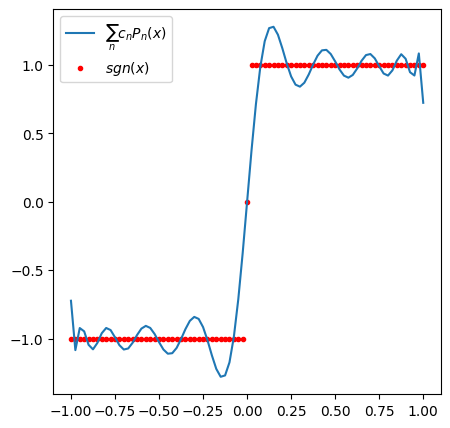

In [60]:
plt.figure(figsize=(5,5))
plt.plot(x_,f(x_))
plt.scatter(x_,signs,color="red",marker=".")
plt.legend(["$\sum_{n}c_{n}P_{n}(x)$","$sgn(x)$"])

# MonteCarlo: Problema 6

In [61]:
def CreateSphere(N,R=1):
    
    Points = np.zeros((N,3))
        
    for i in (range(N)):
        
        phi = np.random.uniform(0,2*np.pi)
        u = np.random.rand()
        r = R*u**(1/3)
        costheta = np.random.uniform(-1,1)
        theta = np.arccos(costheta)
        
        Points[i] = [r*np.cos(phi)*np.sin(theta),r*np.sin(phi)*np.sin(theta),r*np.cos(theta)]
        
    return Points
Sphere = CreateSphere(1000)

In [62]:
Ixx = np.average(Sphere[:,1]**2 + Sphere[:,2]**2)
print("Valor:", Ixx, "Error:", np.abs((2/5)-Ixx))

Valor: 0.3988813592774024 Error: 0.001118640722597597


In [63]:
Iyy = np.average(Sphere[:,0]**2 + Sphere[:,2]**2)
print("Valor:", Iyy, "Error:", np.abs((2/5)-Iyy))

Valor: 0.401144057956295 Error: 0.0011440579562949638


In [64]:
Izz = np.average(Sphere[:,1]**2 + Sphere[:,2]**2)
print("Valor:", Izz, "Error:", np.abs((2/5)-Izz))

Valor: 0.3988813592774024 Error: 0.001118640722597597


In [65]:
Ixy = -np.average(Sphere[:,1]*Sphere[:,0])
Ixy

0.006969254600729408

In [66]:
"""
Se puede concluir que el producto de inercia es 0,
por lo que quiere decir que la distribución de masa
es simétrica en todas las direcciones. En otras palabras,
cualquier rotación alrededor de su centro no cambia
la apariencia de la esfera (es idéntica a sí misma
después de cualquier rotación).
"""

'\nSe puede concluir que el producto de inercia es 0,\npor lo que quiere decir que la distribución de masa\nes simétrica en todas las direcciones. En otras palabras,\ncualquier rotación alrededor de su centro no cambia\nla apariencia de la esfera (es idéntica a sí misma\ndespués de cualquier rotación).\n'